_After inspecting the total rainfall and the variability between both Spurs1 and Spurs2, we decided that the predetermined measure of a "rain event" (2 mm over 3 hrs) may not be a good general measure._

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import seaborn as sns
%matplotlib inline

In [76]:
data = pd.read_csv('data.csv')
data2 = pd.read_csv('data2.csv')
data = data.set_index('new_time')
data2 = data2.set_index('new_time')
data2.head()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
new_time,,,,,,,,,,,,,,,,,,,,,
2016-08-24 02:30:00.000028800,736566.104167,32.785813,29.972728,1.499305,-35.279577,0.000000,0.000000,0.0,2016,8,...,-0.949913,0.090521,-1.915939,3.406521,0.000000,0.000000,Spurs2,0.000000,0.000000,0.000000
2016-08-24 03:29:59.999971200,736566.145833,32.789527,30.088739,2.201161,-44.300444,0.000000,0.000000,0.0,2016,8,...,-0.944399,0.006298,-1.601975,3.593902,0.000113,0.071216,Spurs2,2.067004,0.111099,0.366879
2016-08-24 04:30:00.000000000,736566.187500,32.627960,29.630041,4.694584,-80.636065,10.613047,10.613047,0.0,2016,8,...,-1.184285,-0.332949,-0.486581,2.853013,-0.004927,-3.166366,Spurs2,-8.128834,0.285528,0.962475
2016-08-24 05:30:00.000028800,736566.229167,32.606144,29.366735,1.339539,141.605791,1.210007,11.823053,0.0,2016,8,...,-1.216677,1.742009,-1.987408,2.427721,-0.000669,-0.431001,Spurs2,-4.737377,-0.819523,-0.693011
2016-08-24 06:29:59.999971200,736566.270833,32.606789,29.310380,1.805641,100.847879,0.000000,11.823053,0.0,2016,8,...,-1.215719,1.361473,-1.778904,2.336697,0.000020,0.011158,Spurs2,-1.021055,-0.056845,0.259200


# Looking at Spurs1

In [259]:
print(data['precip'].sum())
data['precip'].describe()

711.9206638361812


count    9133.000000
mean        0.077950
std         0.889278
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.374674
Name: precip, dtype: float64

So we can see that though the maximum rainfall in one hour is over 35 millimeters, the mean rainfall is only 0.078 millimeters with a variance of 0.79081536 millimeters. Also, for such a small mean and variance it is curious that there were over 700 millimeters of rainfall in the year span of the data.

In [260]:
large = data[data['precip'] > 15]
print(large['precip'].count())
large['precip'].sum()

7


166.33233761510294

So we see above that there are only 7 instances of rainfall greater than 15 mm/hr for Spurs1, but they account for about 24% of the data. On the other end of the scale...

In [261]:
other = data[(data['precip'] > 0) & (data['precip'] < .21)]
print(other['precip'].count())
other['precip'].sum()

192


16.707725507309327

Very small amounts of rainfall account for about 43% of the data points we have, but only 2.3% of the rainfall.

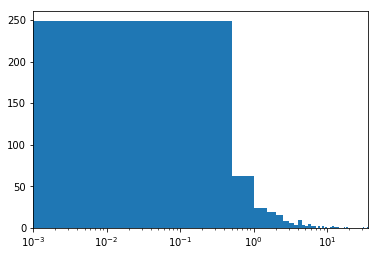

In [262]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data['precip'], bins=np.arange(0.001,36.001,0.5))
plt.xlim([0.001,36.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:71] + 0.25
#bin_centers
#print(a)

In [263]:
sums = n*bin_centers
sums

array([62.499, 47.313, 30.024, 33.269, 36.016, 22.008, 19.506, 15.004,
       42.51 , 19.004, 15.753, 28.755, 18.753, 20.253,  0.   , 15.502,
        0.   , 26.253,  0.   ,  9.751,  0.   ,  0.   , 11.251, 23.502,
       24.502, 12.751, 13.251, 13.751, 14.251,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , 17.251,  0.   , 18.251, 18.751,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , 21.751,  0.   ,  0.   , 23.251,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 31.251,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 35.251])

In [264]:
sums.cumsum()

array([ 62.499, 109.812, 139.836, 173.105, 209.121, 231.129, 250.635,
       265.639, 308.149, 327.153, 342.906, 371.661, 390.414, 410.667,
       410.667, 426.169, 426.169, 452.422, 452.422, 462.173, 462.173,
       462.173, 473.424, 496.926, 521.428, 534.179, 547.43 , 561.181,
       575.432, 575.432, 575.432, 575.432, 575.432, 575.432, 592.683,
       592.683, 610.934, 629.685, 629.685, 629.685, 629.685, 629.685,
       629.685, 651.436, 651.436, 651.436, 674.687, 674.687, 674.687,
       674.687, 674.687, 674.687, 674.687, 674.687, 674.687, 674.687,
       674.687, 674.687, 674.687, 674.687, 674.687, 674.687, 705.938,
       705.938, 705.938, 705.938, 705.938, 705.938, 705.938, 705.938,
       741.189])

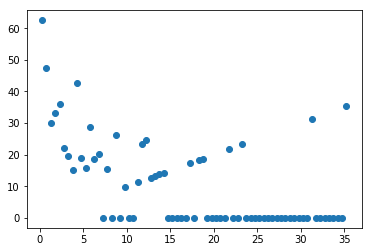

In [265]:
plt.scatter(x=bin_centers, y=sums)

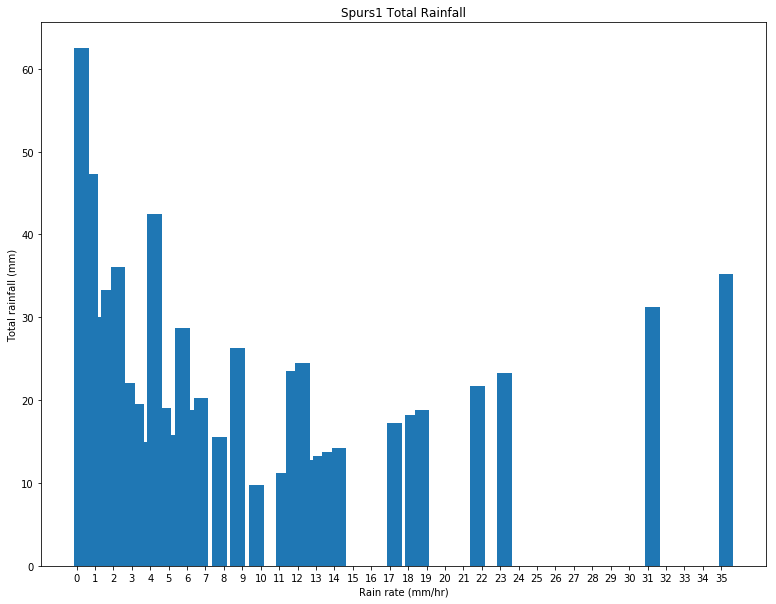

In [266]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Total Rainfall')
plt.xticks(np.arange(0,36,1));

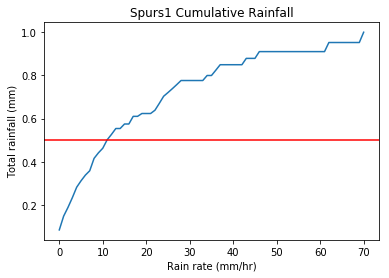

In [267]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:36]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

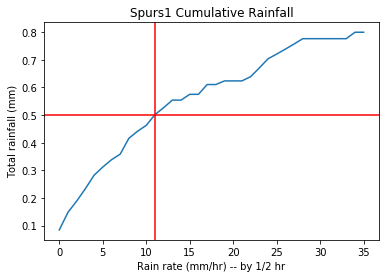

In [268]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=11, color='r')
plt.xlabel('Rain rate (mm/hr) -- by 1/2 hr')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

So we can see that the 50/50 split of rainfall occurs around to 5.5 millimeters/hr; half of all rainfall occurs below that margin.

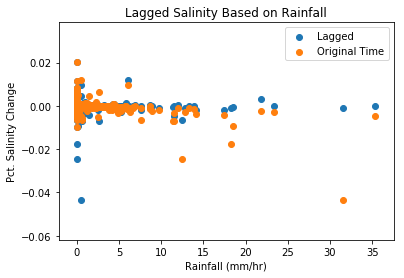

In [274]:
rainlag = data['precip'].reset_index().drop('new_time', axis=1)
pct_lag = data['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
#lagged = pd.DataFrame(rainlag, pct_lag)
#pct_lag
plt.scatter(x=rainlag, y=pct_lag, label='Lagged')
plt.scatter(x=data['precip'], y=data['pct_change'], label='Original Time')
plt.title('Lagged Salinity Based on Rainfall')
plt.ylabel('Pct. Salinity Change')
plt.xlabel('Rainfall (mm/hr)')
plt.legend()
plt.show()

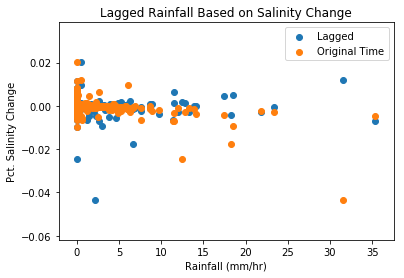

In [276]:
rainlag = pd.DataFrame(data['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
pct_lag = pd.DataFrame(data['pct_change'].reset_index().drop('new_time', axis=1))
newlagged = pd.concat([rainlag, pct_lag], axis=1, join='outer')
#pct_lag
plt.scatter(x=rainlag, y=pct_lag, label='Lagged')
plt.scatter(x=data['precip'], y=data['pct_change'], label='Original Time')
plt.title('Lagged Rainfall Based on Salinity Change')
plt.ylabel('Pct. Salinity Change')
plt.xlabel('Rainfall (mm/hr)')
plt.legend()
plt.show()

In [272]:
#The lagged on salinity set -- did rain cause change
lagged = pd.concat([rainlag, pct_lag], axis=1, join='outer')
lagged.corr()

,precip,pct_change
precip,1.000000,-0.039987
pct_change,-0.039987,1.000000


In [159]:
## Lagged on Rainfall-- did salinity cause precip
newlagged.corr()

,precip,pct_change
precip,1.00000,-0.03958
pct_change,-0.03958,1.00000


In [160]:
## The unaltered original set
data[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.00000,-0.49476
pct_change,-0.49476,1.00000


In [271]:
## Only when rain occurred...
rain = data[data['precip'] > 0]

rain[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.585121
pct_change,-0.585121,1.000000


So for Spurs1, we can conclude that the greatest effect that occurs with percent change in salinity and rainfall is 

a) when rainfall is present, and 

b)within the same hour that it occurs

# Spurs2

In [277]:
print(data2['precip'].sum())
data2['precip'].describe()

3927.2051423026883


count    10459.000000
mean         0.375486
std          1.927136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         45.403696
Name: precip, dtype: float64

In [278]:
large = data2[data2['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = data2[(data2['precip'] > 0) & (data2['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = data2[(data2['precip'] > 0.21) & (data2['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 953.5881939600546 mm over 43 events
Marginal rainfall: 58.33822054609101 mm over 656 events
Rainfall: 546.759144875758 mm over 651 events


In [279]:
data2['precip'].sum()

3927.2051423026883

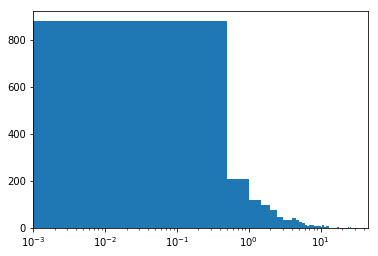

In [280]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data2['precip'], bins=np.arange(0.001,46.001,0.5))
plt.xlim([0.001,45.501])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:91] + 0.25
#bin_centers
#print(a)

In [281]:
sums = n*bin_centers
sums

array([221.131, 155.457, 150.12 , 171.598, 168.825, 129.297, 117.036,
       127.534, 174.291, 156.783, 141.777, 126.522,  81.263,  67.51 ,
        87.012, 100.763,  66.008,  87.51 ,  74.008,  68.257,  41.004,
       118.261,  67.506,  58.755,  85.757, 127.51 ,  26.502,  13.751,
        28.502,  29.502,  30.502,  31.502,  32.502,  33.502,  86.255,
        53.253,  18.251,  18.751,  38.502,  19.751,  40.502,  20.751,
        21.251,  21.751,   0.   ,   0.   ,  23.251,   0.   ,  72.753,
         0.   ,  25.251,  25.751,  78.753,   0.   ,   0.   ,  55.502,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  61.502,   0.   ,
        31.751,   0.   ,  32.751,  33.251,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  45.251])

In [282]:
bin_centers

array([ 0.251,  0.751,  1.251,  1.751,  2.251,  2.751,  3.251,  3.751,
        4.251,  4.751,  5.251,  5.751,  6.251,  6.751,  7.251,  7.751,
        8.251,  8.751,  9.251,  9.751, 10.251, 10.751, 11.251, 11.751,
       12.251, 12.751, 13.251, 13.751, 14.251, 14.751, 15.251, 15.751,
       16.251, 16.751, 17.251, 17.751, 18.251, 18.751, 19.251, 19.751,
       20.251, 20.751, 21.251, 21.751, 22.251, 22.751, 23.251, 23.751,
       24.251, 24.751, 25.251, 25.751, 26.251, 26.751, 27.251, 27.751,
       28.251, 28.751, 29.251, 29.751, 30.251, 30.751, 31.251, 31.751,
       32.251, 32.751, 33.251, 33.751, 34.251, 34.751, 35.251, 35.751,
       36.251, 36.751, 37.251, 37.751, 38.251, 38.751, 39.251, 39.751,
       40.251, 40.751, 41.251, 41.751, 42.251, 42.751, 43.251, 43.751,
       44.251, 44.751, 45.251])

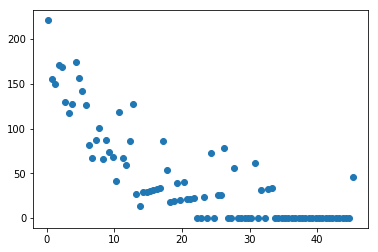

In [283]:
plt.scatter(x=bin_centers, y=sums)

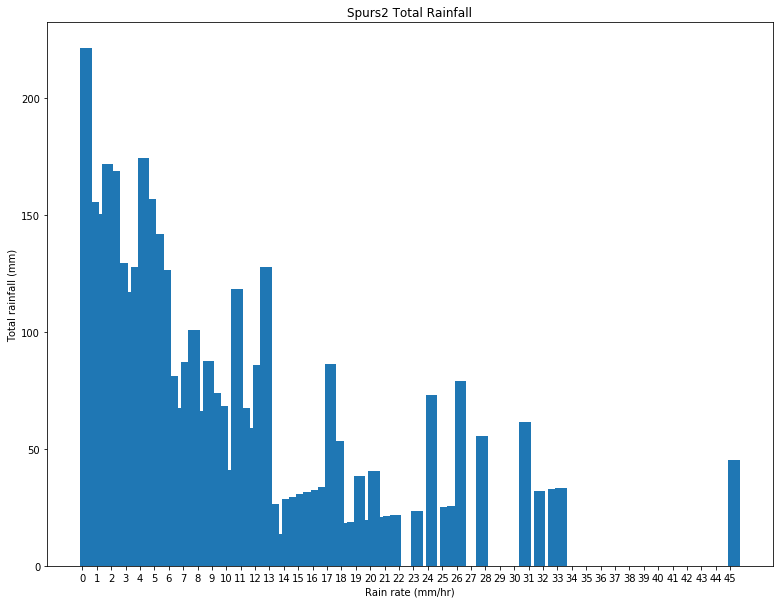

In [284]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Total Rainfall')
plt.xticks(np.arange(0,46,1));

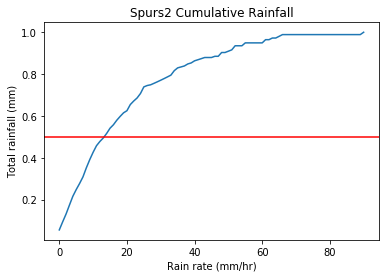

In [285]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:46]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Cumulative Rainfall');

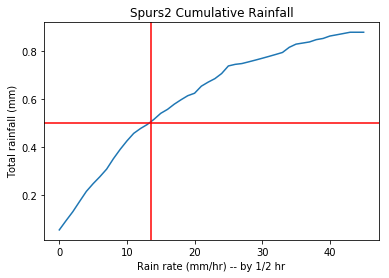

In [286]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=13.5, color='r')
plt.xlabel('Rain rate (mm/hr) -- by 1/2 hr')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Cumulative Rainfall');

In this spurs2 set, we know there are far more rain events, especially larger ones. Thus, it is not surprising that 50% of our rainfall occurs at a much higher threshold than Spurs1, at about 6.75 mm/ hr

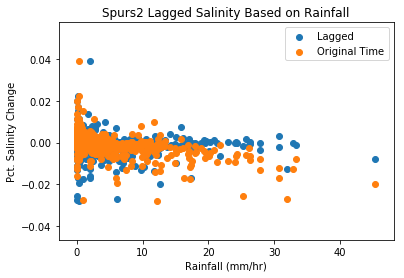

In [287]:
rain_lag2 = pd.DataFrame(rain2['precip'].reset_index().drop('new_time', axis=1))
pct_rain_lag2 = pd.DataFrame(rain2['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
rainlagged = pd.concat([rain_lag2, pct_rain_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=rain_lag2, y=pct_rain_lag2, label='Lagged')
plt.scatter(x=rain2['precip'], y=rain2['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('Spurs2 Lagged Salinity Based on Rainfall')
plt.legend()
plt.show()

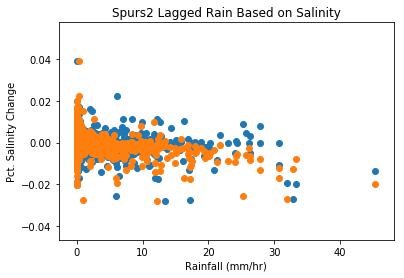

In [288]:
rainlag2 = pd.DataFrame(data2['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
pct_lag2 = pd.DataFrame(data2['pct_change'].reset_index().drop('new_time', axis=1))
lagged2 = pd.concat([rainlag2, pct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=rainlag2, y=pct_lag2, label='Lagged')
plt.scatter(x=data2['precip'], y=data2['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('Spurs2 Lagged Rain Based on Salinity')
plt.show()

In [289]:
## Lagged on Salinity Change-- did rain cause?
rainlagged.corr()

,precip,pct_change
precip,1.000000,-0.118177
pct_change,-0.118177,1.000000


In [290]:
# Lagged on rainfall-- did a salinity change cause?
lagged2.corr()

,precip,pct_change
precip,1.000000,-0.216265
pct_change,-0.216265,1.000000


In [293]:
## Same hour, when rain occurred
rain2 = data2[data2['precip'] > 0]
rain2[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.508551
pct_change,-0.508551,1.000000


In [166]:
# The unaltered data set
data2[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.429775
pct_change,-0.429775,1.000000


So again, we can conclude that there is no greater effect of salinity on rainfall (and vice versa) than when any rain actually occurs, and within the same hour.

# Other Data Sets

## NTAS Set

In [294]:
ntas = pd.read_csv('ntas.csv')
ntas = ntas.set_index('new_time')
print(ntas['precip'].sum())
ntas.head()

365.16062089206594


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2001-03-31 01:00:00.000028800,730941.041667,36.224918,25.322590,7.257993,42.888125,0.0,0.0,0.0
2001-03-31 01:59:59.999971200,730941.083333,36.225780,25.307935,7.517357,42.881045,0.0,0.0,0.0
2001-03-31 03:00:00.000000000,730941.125000,36.227262,25.307050,7.063114,42.873965,0.0,0.0,0.0
2001-03-31 04:00:00.000028800,730941.166667,36.227101,25.300624,6.655590,42.866885,0.0,0.0,0.0
2001-03-31 04:59:59.999971200,730941.208333,36.227896,25.291787,7.105266,42.859806,0.0,0.0,0.0


In [295]:
ntas[['precip', 'cum_precip3']].describe()

,precip,cum_precip3
count,8169.000000,8169.000000
mean,0.044701,0.134102
std,0.430652,0.872563
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,15.928774,18.802948


In [296]:
large = ntas[ntas['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = ntas[(ntas['precip'] > 0) & (ntas['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = ntas[(ntas['precip'] > .21) & (ntas['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 15.928773879325464 mm over 1 events
Marginal rainfall: 21.84174295095084 mm over 358 events
Rainfall: 118.08693571022722 mm over 183 events


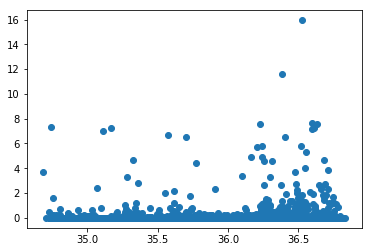

In [297]:
plt.scatter(x=ntas['sss'], y=ntas['precip'])

So here, there are very few instances of any rainfall over 8 mm in an hour.

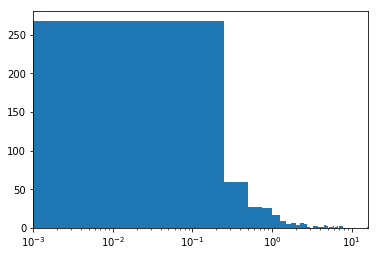

In [298]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(ntas['precip'], bins=np.arange(0.001,16.251,0.25))
plt.xlim([0.001,16.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:64] + 0.125
#bin_centers
#print(a)

In [299]:
n.shape

(64,)

[33.768 22.56  16.902 22.776 19.142 12.384  8.13  11.256  8.504 14.256
 13.13   2.876  0.    10.128  7.252  3.876  4.126  4.376 18.504  9.752
  0.     5.376  5.626 11.752  0.     6.376 13.252  0.    21.378 14.752
 22.878  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    11.626  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.    15.876]


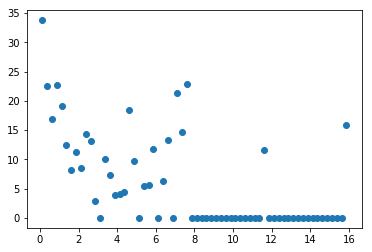

In [300]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

So here, there are very few large values that occur just once.

In [301]:
sums.cumsum()

array([ 33.768,  56.328,  73.23 ,  96.006, 115.148, 127.532, 135.662,
       146.918, 155.422, 169.678, 182.808, 185.684, 185.684, 195.812,
       203.064, 206.94 , 211.066, 215.442, 233.946, 243.698, 243.698,
       249.074, 254.7  , 266.452, 266.452, 272.828, 286.08 , 286.08 ,
       307.458, 322.21 , 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       372.59 ])

And again, we see that this is a valid reflection of the actual summed rainfall for the NTAS buoy

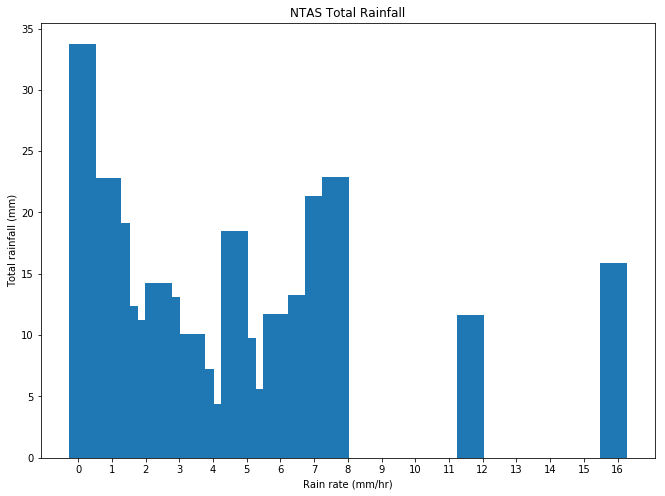

In [302]:
_, ax = plt.subplots(figsize=(11,8))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('NTAS Total Rainfall')
plt.xticks(np.arange(0,17,1));

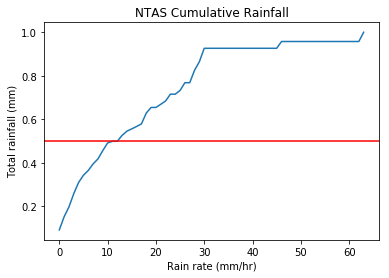

In [303]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:33]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('NTAS Cumulative Rainfall');

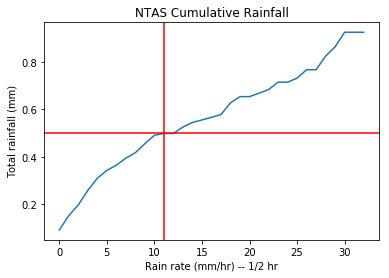

In [304]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=11, color='r')
plt.xlabel('Rain rate (mm/hr) -- 1/2 hr')
plt.ylabel('Total rainfall (mm)')
plt.title('NTAS Cumulative Rainfall');

In this set, about half of all rainfall occurs below 5.5 millimeters, which we could probably have assumed by the small amount of larger rain events.

In [305]:
ntas['pct_change'] = ntas['sss'].pct_change().fillna(0)

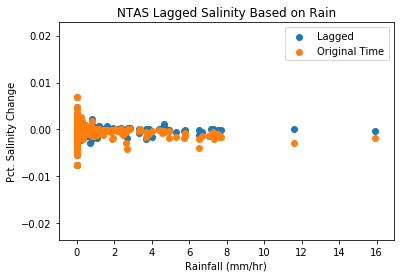

In [306]:
ntaslag2 = pd.DataFrame(ntas['precip'].reset_index().drop('new_time', axis=1))
npct_lag2 = pd.DataFrame(ntas['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
nlag1 = pd.concat([ntaslag2, npct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=ntaslag2, y=npct_lag2, label='Lagged')
plt.scatter(x=ntas['precip'], y=ntas['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('NTAS Lagged Salinity Based on Rain')
plt.legend()
plt.show()

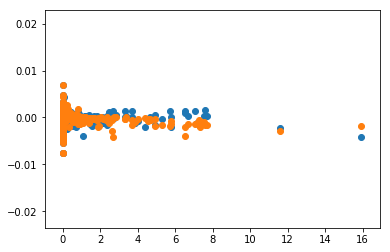

In [176]:
ntaslag2 = pd.DataFrame(ntas['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
npct_lag2 = pd.DataFrame(ntas['pct_change'].reset_index().drop('new_time', axis=1))
nlag2 = pd.concat([ntaslag2, npct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=ntaslag2, y=npct_lag2)
plt.scatter(x=ntas['precip'], y=ntas['pct_change'])
plt.show()

In [172]:
## Correlation between lagged salinity and rainfall-- does salinity change cause rainfall here?
nlag1.corr()

,precip,pct_change
precip,1.000000,-0.037957
pct_change,-0.037957,1.000000


In [177]:
nlag2.corr()

,precip,pct_change
precip,1.000000,-0.094261
pct_change,-0.094261,1.000000


In [112]:
## For just rain events, at 
ntas_rain[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.558027
pct_change,-0.558027,1.000000


In [167]:
ntas[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.223184
pct_change,-0.223184,1.000000


This is an interesting set of correlations, as once again the strongest is when rain occurs and within the same hour. However, it is remarkable to note how low the correlation with a lagged time frame is here, with -0.04 and -0.09 lagged on salinity and rain, respectively.

## WHOTS Set

In [246]:
whots = pd.read_csv('whots.csv')
whots = whots.set_index('new_time')
print(whots['precip'].sum())
whots.head()

899.9853937686307


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2004-08-13 04:00:00.000028800,732172.166667,34.825873,26.888086,7.918918,38.233802,0.000000,0.0,0.000000
2004-08-13 04:59:59.999971200,732172.208333,34.824762,26.865158,7.506199,38.236220,0.000000,0.0,0.000000
2004-08-13 06:00:00.000000000,732172.250000,34.825625,26.856876,8.299770,38.238638,0.000000,0.0,0.000000
2004-08-13 07:00:00.000028800,732172.291667,34.826258,26.842372,8.377580,38.241056,0.000000,0.0,0.000000
2004-08-13 07:59:59.999971200,732172.333333,34.825453,26.828082,8.759666,38.243474,0.350616,0.0,0.350616


In [247]:
whots['precip'].describe()

count    8317.000000
mean        0.108210
std         1.288135
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.250181
Name: precip, dtype: float64

In [248]:
large = whots[whots['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over' ,large['precip'].count(), 'events')
small = whots[(whots['precip'] > 0) & (whots['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = whots[(whots['precip'] > .21) & (whots['precip'] < 2)]
print('Normal rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')


Substantive rainfall: 329.8583652542303 mm over 12 events
Marginal rainfall: 30.75673068121871 mm over 324 events
Normal rainfall: 188.21578865681337 mm over 307 events


So here we see that there are a whopping 12 rain events greater than 15 mm per hour, and that they make up almost 330 millimeters. This is a giant gap compared to the very small rain events.

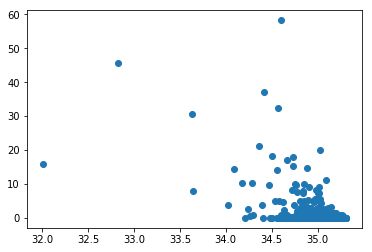

In [249]:
plt.scatter(x=whots['sss'], y=whots['precip'])

This is an interesting plot; we see that there is not much variability in salinity for most of the set, but where there is noticeable difference there is always a rain event.

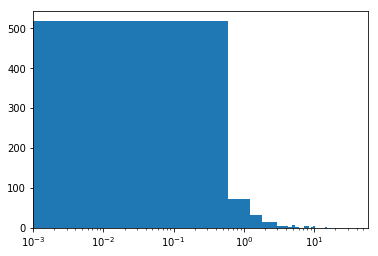

In [250]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(whots['precip'], bins=np.arange(0.001,59.21,0.6))
plt.xlim([0.001,58.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:98] + 0.3
#bin_centers
#print(a)

[156.219  64.872  49.533  33.616  43.216  13.204  15.604  13.503  35.707
  17.103   0.      0.     30.004  32.404   0.     18.602  49.505  10.501
  11.101   0.      0.      0.      0.     14.101  29.402  15.301  15.901
   0.     17.101  17.701  18.301   0.      0.     20.101   0.     21.301
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.     30.301   0.      0.      0.
  32.701   0.      0.      0.      0.      0.      0.      0.     37.501
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.     45.901   0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     58.501]


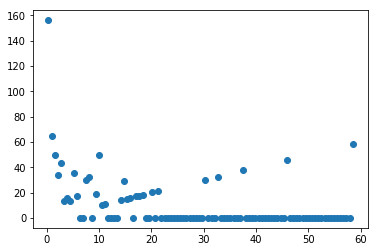

In [251]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

In [252]:
sums.cumsum()

array([156.219, 221.091, 270.624, 304.24 , 347.456, 360.66 , 376.264,
       389.767, 425.474, 442.577, 442.577, 442.577, 472.581, 504.985,
       504.985, 523.587, 573.092, 583.593, 594.694, 594.694, 594.694,
       594.694, 594.694, 608.795, 638.197, 653.498, 669.399, 669.399,
       686.5  , 704.201, 722.502, 722.502, 722.502, 742.603, 742.603,
       763.904, 763.904, 763.904, 763.904, 763.904, 763.904, 763.904,
       763.904, 763.904, 763.904, 763.904, 763.904, 763.904, 763.904,
       763.904, 794.205, 794.205, 794.205, 794.205, 826.906, 826.906,
       826.906, 826.906, 826.906, 826.906, 826.906, 826.906, 864.407,
       864.407, 864.407, 864.407, 864.407, 864.407, 864.407, 864.407,
       864.407, 864.407, 864.407, 864.407, 864.407, 864.407, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 968.809])

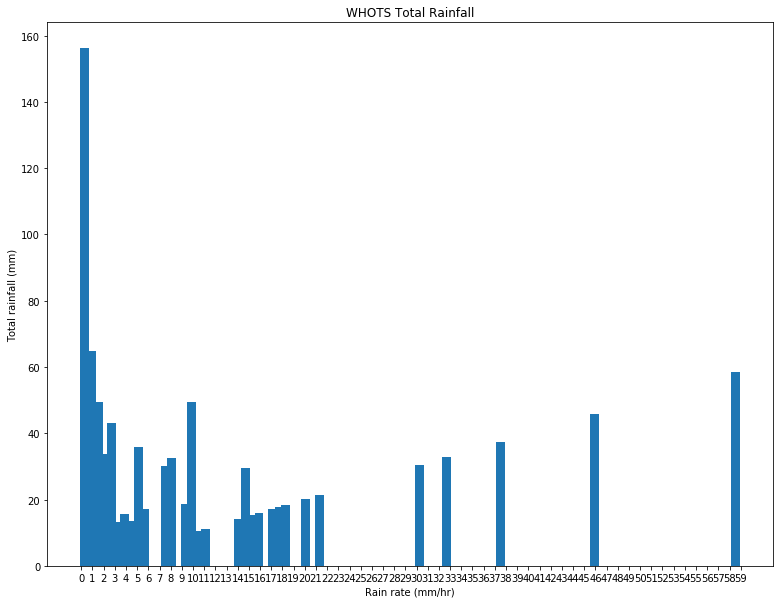

In [253]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Total Rainfall')
plt.xticks(np.arange(0,60,1));

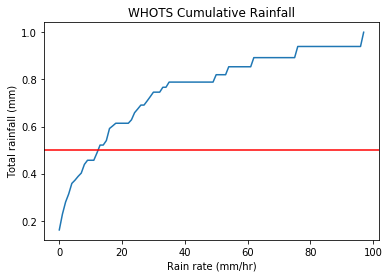

In [254]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:50]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Cumulative Rainfall');

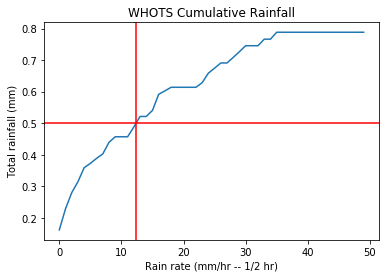

In [255]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=12.3, color='r')
plt.xlabel('Rain rate (mm/hr -- 1/2 hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Cumulative Rainfall');

In [258]:
fullsum

array([0.1612485 , 0.22820907, 0.27933679, 0.31403507, 0.35864242,
       0.37227152, 0.38837789, 0.40231563, 0.43917222, 0.45682586,
       0.45682586, 0.45682586, 0.48779584, 0.52124309, 0.52124309,
       0.54044399, 0.59154281, 0.60238189, 0.61384029, 0.61384029,
       0.61384029, 0.61384029, 0.61384029, 0.62839528, 0.65874388,
       0.6745375 , 0.69095044, 0.69095044, 0.70860201, 0.72687289,
       0.7457631 , 0.7457631 , 0.7457631 , 0.76651125, 0.76651125,
       0.78849804, 0.78849804, 0.78849804, 0.78849804, 0.78849804,
       0.78849804, 0.78849804, 0.78849804, 0.78849804, 0.78849804,
       0.78849804, 0.78849804, 0.78849804, 0.78849804, 0.78849804,
       0.81977459, 0.81977459, 0.81977459, 0.81977459, 0.8535284 ,
       0.8535284 , 0.8535284 , 0.8535284 , 0.8535284 , 0.8535284 ,
       0.8535284 , 0.8535284 , 0.89223676, 0.89223676, 0.89223676,
       0.89223676, 0.89223676, 0.89223676, 0.89223676, 0.89223676,
       0.89223676, 0.89223676, 0.89223676, 0.89223676, 0.89223

Surprisingly enough, even with the huge variability and amount of large rain events, the 50% mark of total cumulative rainfall still lies around 6.15 millimeters/hr, which is similar to everything else we've seen.

In [257]:
## One thought
print('First cumulative third of rainfall:', fullsum[fullsum<0.33].shape)
print('From the first to the second cumul. third:', fullsum[(fullsum >0.33) & (fullsum < .66)].shape)
print('Significant rain events:', fullsum[fullsum > 0.66].shape)

First cumulative third of rainfall: (4,)
From the first to the second cumul. third: (21,)
Significant rain events: (73,)


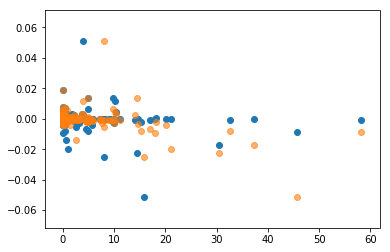

In [179]:
whots['pct_change'] = whots['sss'].pct_change().fillna(0)
whotslag = pd.DataFrame(whots['precip'].reset_index().drop('new_time', axis=1))
wpct_lag = pd.DataFrame(whots['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
wlag = pd.concat([whotslag, wpct_lag], axis=1, join='outer')
plt.scatter(x=whotslag, y=wpct_lag)
plt.scatter(x=whots['precip'], y=whots['pct_change'], alpha=0.6)
plt.show()

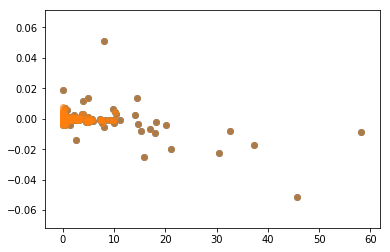

In [181]:
whots_rain = whots[whots['precip'] > 0]
whotslag2 = pd.DataFrame(whots_rain['precip'].reset_index().drop('new_time', axis=1))
wpct_lag2 = pd.DataFrame(whots_rain['pct_change'].reset_index().drop('new_time', axis=1))
w_nolag2 = pd.concat([whotslag2, wpct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=whotslag2, y=wpct_lag2)
plt.scatter(x=whots['precip'], y=whots['pct_change'], alpha=0.6)
plt.show()

In [182]:
w_nolag2.corr()

,precip,pct_change
precip,1.000000,-0.475307
pct_change,-0.475307,1.000000


In [183]:
wlag.corr()

,precip,pct_change
precip,1.000000,-0.171184
pct_change,-0.171184,1.000000


In [184]:
whots[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.453891
pct_change,-0.453891,1.000000


Finally, we see once again that there is a weak correlation between a lagged variable and rainfall. The strongest correlation is between sss and precipitation in the same hour, and again there is an even stronger correlation between rainfall and salinity in the same hour when rainfall was present. This is a trend for every single buoy, and so we should conclude that lagged variables are probably not what we want to inspect, at least not as a one-variable response. Instead, it appears that any change in salinity due to rainfall (or vice versa) would either be a quick and temporary change due to the rainfall, or an event caused by a sudden change in salinity.

# Conclusions (for now)

In [206]:
## Looking at the distributions of 50% accumulation of rainfall for buoys...
dist = np.array([5.5,6.75,5.5,6.15])
print(np.mean(dist))
print(np.std(dist))

5.975
0.5202163011671204


We can draw three main conclusions from what we've done here:

1) There does not seem to be any hard evidence that putting a time lag on either salinity or rainfall gives a better casual relationship between the two; the best correlations that we see occur within the same hour, and we see an even stronger relationship with every single buoy between the two when rain is present, which makes sense.

2) Each buoy has a relatively different threshold at which 50% of all of it's rainfall has occurred, in terms of rates of rainfall by hour. The more tropical buoys, such as Spurs2 and WHOTS, have a much larger threshold, especially Spurs2; thus, comparing what we classify as a rain event at one buoy may not necessarily be appropriate for another.

3) We see bimodal distributions of rainfall for every single rate, at every single buoy. That is, there are large amounts of very minor rain events, very few at the (relative) middle range for each buoy, and then larger representation for more significant rain events. This is true even in sparse rain climates such as NTAS and Spurs1.

__Thoughts:__ Maybe coming up with a method of classification that does not have to be hard coded, for each third of that area's total annual rainfall per rainfall rate in mm/hr. Therefore, we would have four categories: No Rain, Minor Rain, Rain, Significant Rain; our reasoning behind this is that each of these categories has drastically different representation between each buoy, but they do also all follow the same bimodal trend. Therefore, we believe this to be a reasonable outline of rain classes moving forward.

In [245]:
## One thought
print('First cumulative third of rainfall:', fullsum[fullsum<0.33].shape)
print('From the first to the second cumul. third:', fullsum[(fullsum >0.33) & (fullsum < .66)].shape)
print('Significant rain events:', fullsum[fullsum > 0.66].shape)

First cumulative third of rainfall: (4,)
From the first to the second cumul. third: (21,)
Significant rain events: (73,)
